<a href="https://colab.research.google.com/github/victorsomadina/Afro_Med_Code_Base/blob/master/Medical_Imaging_witn_Simple_Neural_Network_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing the Dataset

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
import zipfile
from torchvision import transforms
from sklearn.model_selection import train_test_split
import shutil
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

In [2]:
# Installing Kaggle API
!pip install kaggle

In [3]:
# Uploading Kaggle API Key
os.environ['KAGGLE_CONFIG_DIR'] = "/content/sample_data/kaggle.json"

# Creating the .kaggle directory if it does not exist
os.makedirs('/root/.kaggle', exist_ok=True)

# Move the uploaded kaggle.json file to the correct directory
!mv kaggle.json /root/.kaggle/

# Downloading the Dataset
!kaggle datasets download -d prahladmehandiratta/cervical-cancer-largest-dataset-sipakmed

# Unzipping the dataset
with zipfile.ZipFile('cervical-cancer-largest-dataset-sipakmed.zip', 'r') as zip_ref:  # Replace with actual file name if different
    zip_ref.extractall('/content/si_pak_med')

# Imaging Preprocessing

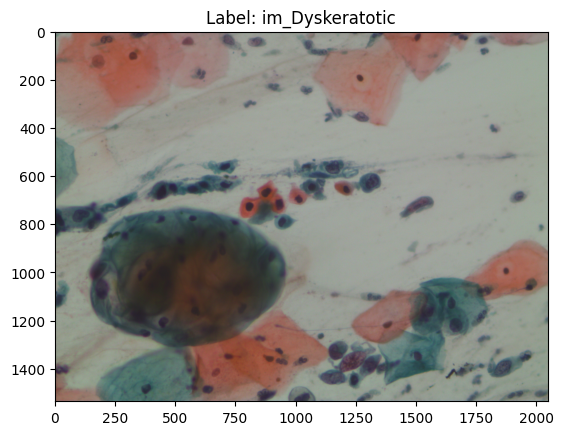

Image Size: (2048, 1536)


In [8]:
# Loading dataset without transformations for inspection
raw_dataset = datasets.ImageFolder(root='/content/si_pak_med')

# Function to show sample image and size
def show_sample_image(dataset, index):
    image, label = dataset[index]
    plt.imshow(image)  # Directly showing PIL image
    plt.title(f"Label: {dataset.classes[label]}")
    plt.show()
    print(f"Image Size: {image.size}")

# Showing a sample image and its size
show_sample_image(raw_dataset, 0)


In [12]:
dataset_path = '/content/si_pak_med'

# Check the formats of the images
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            file_path = os.path.join(root, file)
            with Image.open(file_path) as img:
                print(f"File: {file_path}, Format: {img.format}")

Streaming output truncated to the last 5000 lines.
File: /content/si_pak_med/im_Parabasal/im_Parabasal/075.bmp, Format: BMP
File: /content/si_pak_med/im_Parabasal/im_Parabasal/057.bmp, Format: BMP
File: /content/si_pak_med/im_Parabasal/im_Parabasal/103.bmp, Format: BMP
File: /content/si_pak_med/im_Parabasal/im_Parabasal/106.bmp, Format: BMP
File: /content/si_pak_med/im_Parabasal/im_Parabasal/093.bmp, Format: BMP
File: /content/si_pak_med/im_Parabasal/im_Parabasal/038.bmp, Format: BMP
File: /content/si_pak_med/im_Parabasal/im_Parabasal/031.bmp, Format: BMP
File: /content/si_pak_med/im_Parabasal/im_Parabasal/052.bmp, Format: BMP
File: /content/si_pak_med/im_Parabasal/im_Parabasal/071.bmp, Format: BMP
File: /content/si_pak_med/im_Parabasal/im_Parabasal/006.bmp, Format: BMP
File: /content/si_pak_med/im_Parabasal/im_Parabasal/054.bmp, Format: BMP
File: /content/si_pak_med/im_Parabasal/im_Parabasal/065.bmp, Format: BMP
File: /content/si_pak_med/im_Parabasal/im_Parabasal/091.bmp, Format: BMP


In [13]:
dataset_path = '/content/si_pak_med'

# Check the formats of the images
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.dat')):
            file_path = os.path.join(root, file)
            try:
                # Try to open the image file
                with Image.open(file_path) as img:
                    print(f"File: {file_path}, Format: {img.format}")
            except IOError:
                print(f"Cannot open file: {file_path}")
            except Exception as e:
                print(f"Error with file: {file_path}. Exception: {e}")

Streaming output truncated to the last 5000 lines.
Cannot open file: /content/si_pak_med/im_Metaplastic/im_Metaplastic/CROPPED/056_01_nuc.dat
Cannot open file: /content/si_pak_med/im_Metaplastic/im_Metaplastic/CROPPED/142_01_nuc.dat
File: /content/si_pak_med/im_Metaplastic/im_Metaplastic/CROPPED/138_04.bmp, Format: BMP
Cannot open file: /content/si_pak_med/im_Metaplastic/im_Metaplastic/CROPPED/202_09_nuc.dat
Cannot open file: /content/si_pak_med/im_Metaplastic/im_Metaplastic/CROPPED/074_08_nuc.dat
File: /content/si_pak_med/im_Metaplastic/im_Metaplastic/CROPPED/066_02.bmp, Format: BMP
File: /content/si_pak_med/im_Metaplastic/im_Metaplastic/CROPPED/010_02.bmp, Format: BMP
File: /content/si_pak_med/im_Metaplastic/im_Metaplastic/CROPPED/013_02.bmp, Format: BMP
Cannot open file: /content/si_pak_med/im_Metaplastic/im_Metaplastic/CROPPED/182_01_cyt.dat
File: /content/si_pak_med/im_Metaplastic/im_Metaplastic/CROPPED/218_04.bmp, Format: BMP
File: /content/si_pak_med/im_Metaplastic/im_Metaplasti

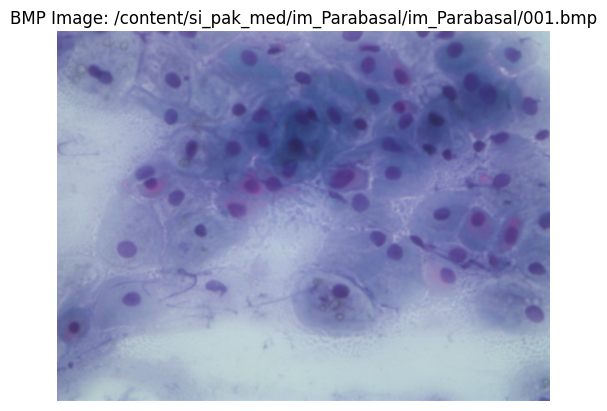

In [14]:
def display_bmp_image(file_path):
    try:
        # Open the BMP image
        img = Image.open(file_path)

        # Display the image using matplotlib
        plt.imshow(img)
        plt.title(f'BMP Image: {file_path}')
        plt.axis('off')
        plt.show()

    except IOError:
        print(f"Cannot open BMP file: {file_path}")

# Example usage
# bmp_file_path = '/content/si_pak_med/im_Parabasal/im_Parabasal/075.bmp'
bmp_file_path = '/content/si_pak_med/im_Parabasal/im_Parabasal/001.bmp'
display_bmp_image(bmp_file_path)

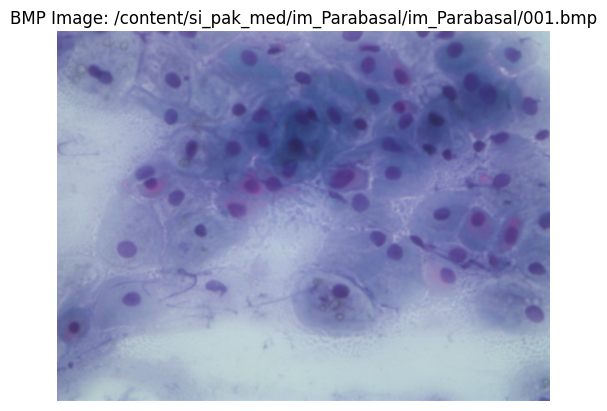

In [18]:
bmp_file_path = '/content/si_pak_med/im_Parabasal/im_Parabasal/001.bmp'
display_bmp_image(bmp_file_path)

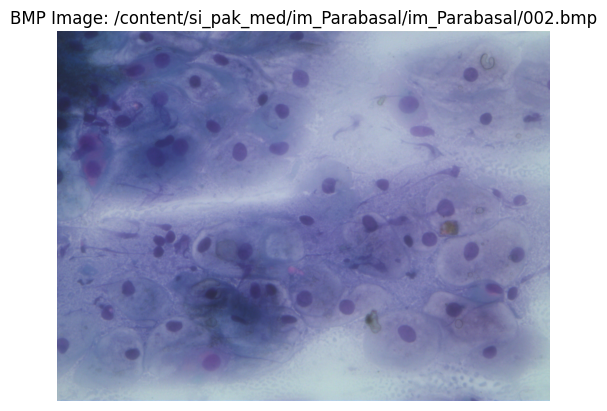

In [19]:
bmp_file_path = '/content/si_pak_med/im_Parabasal/im_Parabasal/002.bmp'
display_bmp_image(bmp_file_path)

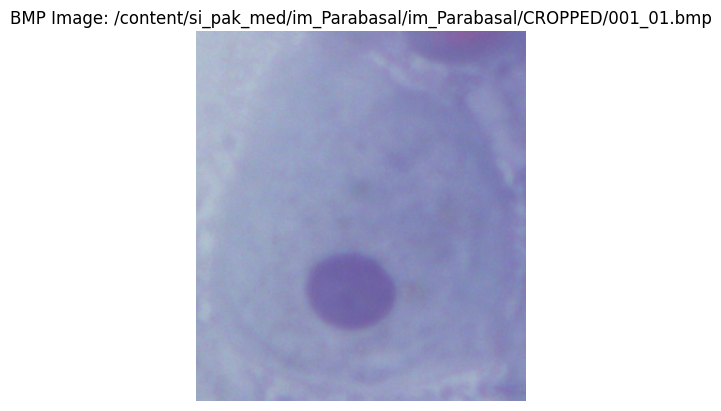

In [14]:
bmp_file_path = '/content/si_pak_med/im_Parabasal/im_Parabasal/CROPPED/001_01.bmp'
display_bmp_image(bmp_file_path)

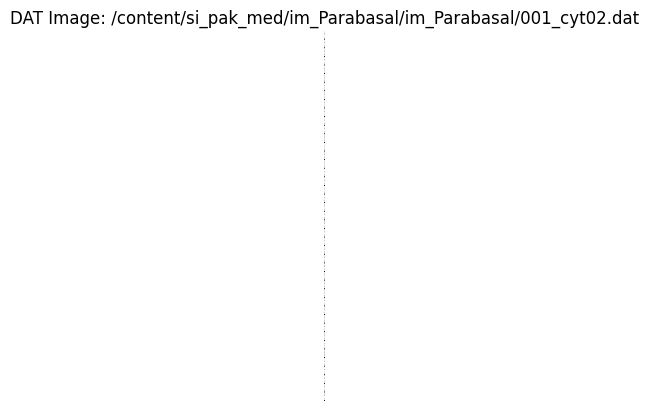

In [15]:
def display_dat_image(file_path):
    try:
        # Read the raw data from the .dat file
        with open(file_path, 'rb') as f:
            data = f.read()

        # Convert the raw data to a numpy array
        # For grayscale images, use dtype=np.uint8. Adjust if necessary.
        image_array = np.frombuffer(data, dtype=np.uint8)

        # Display the raw data as an image
        # Note: If the data isn't in an image format you can display directly,
        # you will need to adapt this part of the code to handle that format.
        # For demonstration, assuming the raw data is suitable for display.
        img = Image.fromarray(image_array, 'L')  # 'L' mode is for grayscale images

        # Display the image using matplotlib
        plt.imshow(img, cmap='gray')
        plt.title(f'DAT Image: {file_path}')
        plt.axis('off')
        plt.show()

    except Exception as e:
        print(f"Error with DAT file: {file_path}. Exception: {e}")

# Example usage
dat_file_path = '/content/si_pak_med/im_Parabasal/im_Parabasal/001_cyt02.dat'
display_dat_image(dat_file_path)

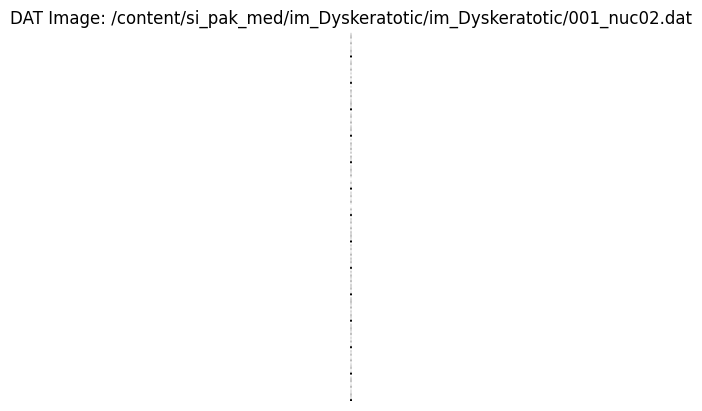

In [17]:
dat_file_path = '/content/si_pak_med/im_Dyskeratotic/im_Dyskeratotic/001_nuc02.dat'
display_dat_image(dat_file_path)

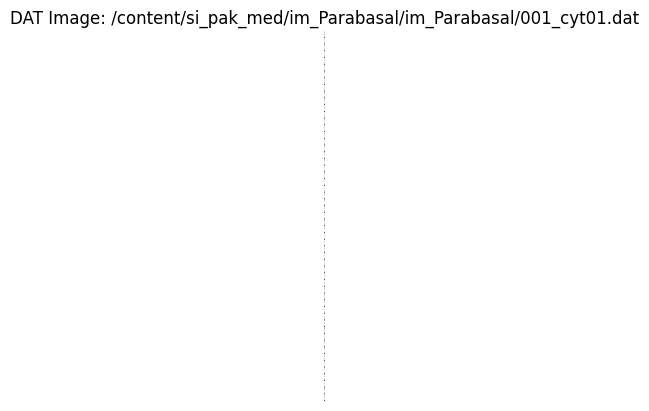

In [21]:
dat_file_path = '/content/si_pak_med/im_Parabasal/im_Parabasal/001_cyt01.dat'
display_dat_image(dat_file_path)

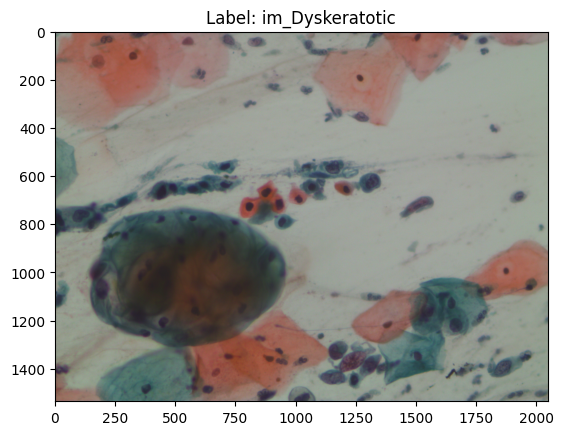

Image Size: (2048, 1536)


In [ ]:
# Loading dataset without transformations for inspection
raw_dataset = datasets.ImageFolder(root='/content/si_pak_med')

# Function to show sample image and size
def show_sample_image(dataset, index):
    # Extract image and label
    image, label = dataset[index]

    # Convert tensor to a PIL Image if necessary (for image size extraction)
    if not isinstance(image, Image.Image):  # Check if image is already a PIL image
        image = Image.fromarray(image.numpy())  # Convert the tensor to a NumPy array and then to a PIL image

    # Show the image using matplotlib
    plt.imshow(image)
    plt.title(f"Label: {dataset.classes[label]}")
    plt.show()

    # Print image size
    print(f"Image Size: {image.size}")

# Showing a sample image and its size
show_sample_image(raw_dataset, 0)


# Creating Folders for Only BMP format

In [17]:
def create_bmp_folder(input_folder, output_folder):
    ''' this function enables extraction of the .bmp files from the dataset folder '''
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(input_folder):
        if filename.endswith('.bmp'):
        # Construct full file path
            file_path = os.path.join(input_folder, filename)
        # Move .bmp file to destination directory
            shutil.move(file_path, output_folder)

create_bmp_folder('/content/si_pak_med/im_Dyskeratotic/im_Dyskeratotic', '/content/si_pak_med/main_im_Dyskeratotic')
create_bmp_folder('/content/si_pak_med/im_Koilocytotic/im_Koilocytotic', '/content/si_pak_med/main_im_Koilocytotic')
create_bmp_folder('/content/si_pak_med/im_Metaplastic/im_Metaplastic', '/content/si_pak_med/main_im_Metaplastic')
create_bmp_folder('/content/si_pak_med/im_Parabasal/im_Parabasal', '/content/si_pak_med/main_im_Parabasal')
create_bmp_folder('/content/si_pak_med/im_Superficial-Intermediate/im_Superficial-Intermediate', '/content/si_pak_med/main_im_Superficial-Intermediate')

# Delete Irrelevant Folders

In [ ]:
for folders in os.listdir('/content/si_pak_med'): # delete folders not starting with main
  if folders.startswith('im'):
    !rm -rf /content/si_pak_med/$folders

# Defining the Data Transformers

In [ ]:
# Defining Transformations including resizing
transform = transforms. Compose([
    transforms.Resize((512, 512)), # Resizing images to 224x224
    transforms.ToTensor(), # Convert images to tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]), # Normalizing with ImageNet stats
])

# Defining the path to my dataset directory
dataset_path = '/content/si_pak_med'



# Reloading the Dataset with transformations
dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

In [ ]:
# Showing a sample image after resizing
def show_transformed_sample_image(dataset, index):
  image, label = dataset[index]
  image = transforms.ToPILImage()(image) # convert tensor to PIL image for displaying
  plt.imshow(image)
  plt.title(f"Label: {dataset.classes[label]}")
  plt.show()
  print(f"Image Size after Transformation: {image.size}")

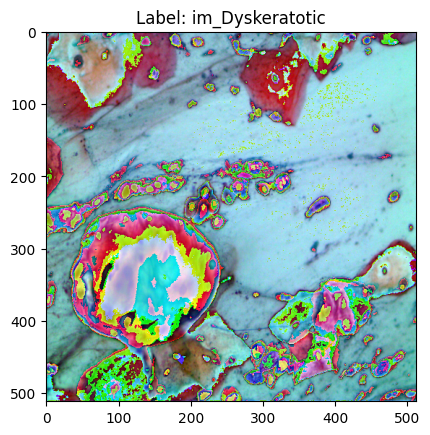

Image Size after Transformation: (512, 512)


In [ ]:
# Showing a sample image after transformation
show_transformed_sample_image(dataset, 0)

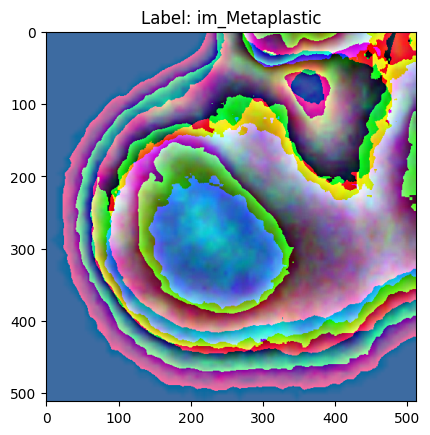

Image Size after Transformation: (512, 512)


In [ ]:
# Showing a sample image after transformation
show_transformed_sample_image(dataset, 3000)

# Splitting the Dataset

In [ ]:
# Splitting the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len()

In [ ]:
# Creating Dataset Objects
